# <center>Kanalcodierung mit MATLAB mit Python </center>
### <center>Praktikumsversuch für das Modul </center>
# <center>Quellen- und Kanalcodierung</center>

In [2]:
%matplotlib inline
from qkclab.lab2 import *
import matplotlib.pyplot as plt,numpy as np

SyntaxError: invalid syntax (lab2.py, line 52)

### Einleitung
Zur Vertiefung der in der Vorlesung 'Grundlagen der Telekommunikation' vermittelten Theorie zum Thema
Kanalcodierung sollen in diesem Versuch mit Hilfe eines weit verbreiteten Simulationswerkzeuges einige Verfahren
und Methoden anhand von Beispielen untersucht werden.
Die Gliederung des Praktikumsversuches ist dabei wie folgt:
* 1 Untersuchung von Block- und Faltungscodes
* 2 Performance der Codes auf dem BSC und AWGN Kanal
* 3 Viterbi Decoder

### Lernziele
* Vertiefen des in der Vorlesung erlernten Stoffes
* Eigenschaften von Block- und Faltungscodes
* Maximum-Likelihood-Decodierung von Faltungscodes

### Literatur
Sklar, Bernhard,: Digital communications; Prentice Hall, 2001, Chapter 2

Lüke, Hans Dieter: Signalübertragung; Springer 1999, Kapitel 1-3

Proakis, Salehi: Contemporary Communiction Systems using MATLAB; PWS, 1998, Chapter 4

Dettmar, Uwe : Hilfsblätter zur Vorlesung »Quellen- und Kanalcodierung«, September 2011

### Hinweis:
#### F: Fragen sind bereits in der Vorbereitung zu Hause zu bearbeiten.</br>
#### M: Messungen und die dazugehörigen Fragen werden während des Praktikums bearbeitet.

## 1 Kanalcodierung
Kommunikation durch gestörte Kanäle kann zu Übertragungsfehlern führen. Um die Auftrittswahrscheinlichkeit
für solche Fehler zu verringern, kann man Sequenzen (Codeworte) übertragen, die sich möglichst stark
unterscheiden, so dass eine Verwechslung der Sequenzen im Empfänger unwahrscheinlicher wird. Hierzu
müssen im Sender zu den Nutzdaten redundante Symbole hinzugefügt werden. Allerdings reduziert sich hierdurch
i.a. auch die Nutzdatenrate, und die Komplexität im Empfänger nimmt zu.
Man unterscheidet grob zwischen Block- und Faltungscodes:
* Bei Blockcodes werden Blöcke von k Informationssymbolen auf n Codesymbole mit n≥k abgebildet, d.h. das entstehende Codewort hängt nur von den k aktuellen Informationssymbolen ab.
* Bei Faltungscodes werden zwar auch k Informationssymbole auf n Codesymbole abgebildet, jedoch hängen
die n Codesymbole zusätzlich von den letzten (L-1)k Informationssymbolen ab.
In diesem Praktikumsversuch werden nur lineare Codes betrachtet. Für diese Klasse von Codes ist die Summe
zweier Codeworte wieder ein Codewort und Mindestdistanz und Mindestgewicht sind gleich.

### 1.1 Lineare Blockcodes
Der Effekt der Kanalcodierung auf die Fehlerwahrscheinlichkeit soll zunächst an einem einfachen Beispiel
demonstriert werden.

#### 1.1.1 Repetition Code
Die zu übertragenden Informationsbits einer Quelle werden n mal hintereinander über einen BSC übertragen.
Im Empfänger wird eine Mehrheitsentscheidung durchgeführt. Jedes Bit wird mit der Wahrscheinlichkeit p
falsch empfangen. Die Wahrscheinlichkeit für einen Detektionsfehler (falsches Codewort) ist durch
### <center>$P_w=\sum\limits_{\substack{k=\lceil(n-1)/2\rceil}}^n \binom{n}{k} p^k(1-p)^{n-k}$</center>
gegeben.

#### M: Verwenden Sie das Skript ip_08_07.m, um diese Wahrscheinlichkeit für verschiedene Werte von n darzustellen. Es sei p=0.3 . Interpretieren Sie das Ergebnis.


1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33


C:\Users\Joschka\AppData\Local\Programs\Python\Python36-32\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in long_scalars


35
37
39
41
43
45
47
49
51
53
55
57
59


C:\Users\Joschka\AppData\Local\Programs\Python\Python36-32\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide


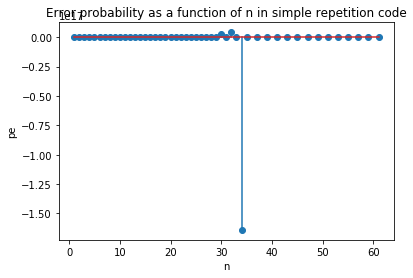

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt,numpy as np

def my_range(start, end, step):
    """
    range for a loop with decimal incrementation
    stepsize step in range of [start, end]
    """
    while start <= end:
        yield start
        start += step
"""        
for i=1:2:61
  p(i)=0;
  for j=(i+1)/2:i
    p(i)=p(i)+prod(1:i)/(prod(1:j)*prod(1:(i-j)))*ep^j*(1-ep)^(i-j);
  end
end
disp('Press a key to see the plot')
pause % Press a key to see the plot
stem((1:2:61),p(1:2:61))
xlabel('n')
ylabel('pe')
title('Error probability as a function of n in simple repetition code')
"""
ep = 0.3
p=np.zeros(61)
for i in range(1,61,2): #0-60 statt 1-61
    print(i)
    for j in my_range(int((i+1)/2),i,1):
        p[i] = p[i] + np.prod(np.arange(1,i)) / (np.prod(np.arange(1,j))*np.prod(np.arange(1, (i - j)))*ep**j * (1 - ep) **(i - j))
t=np.arange(1,62)
plt.stem(t, p)
plt.xlabel('n')
plt.ylabel('pe')
plt.title('Error probability as a function of n in simple repetition code')
plt.show()

#### F: Welches Ergebnis ergibt sich für die Bitfehlerwahrscheinlichkeit und den Bandbreitebedarf auf dem AWGN Kanal beim Vergleich einer uncodierten Übertragung und der codierten Übertragung mit einem RepetitionCode, wenn Nutzdatenrate und Sendeleistung bei der uncodierten und codierten Übertragung gleich sind?

Ein linearer Blockcode wird eindeutig durch seine Generatormatrix G bzw. seine Prüfmatrix H beschrieben.
Es ist $c=uG$ , wobei c ein Codewort (Zeilenvektor der Länge n Symbole) und u ein Informationswort (Zeilenvektor der Länge k Symbole) ist. Für lineare Codes ist die Mindestdistanz $d_min$ gleich dem Mindestgewicht
$w_min$ .

#### M: Gegeben sei die Generatormatrix für einen (10,4) linearen Blockcode. Verwenden Sie das Skript ip_08_08.m, um alle Codeworte zu erzeugen und die Mindestdistanz des Codes zu bestimmen. Wie wird im Skript die Mindestdistanz bestimmt?

In [ ]:
ip_08_08()

#### 1.1.2 Hamming Code

Hamming Codes sind $(2^m−1,2^m−m−1)$ Blockcodes mit der Mindestdistanz 3. Sie werden über ihre
Prüfmatrix definiert. Diese enthält alle binären Worte der Länge m außer dem Nullwort als Spalten.

#### F: Geben Sie die Prüfmatrix eines Hamming Codes der Länge 7 in systematischer Form an. Wie sieht die zugehörige Generatormatrix aus? Wieviele Fehler kann der Code decodieren? Empfangen wurde das Wort r = (0010000). Zeigen Sie wie das Empfangswort decodiert werden kann.
#### M: Verwenden Sie das Skript ip_08_09.m, um alle Codeworte eines (15,11,3) Hamming Codes zu erzeugen und die Mindestdistanz zu berechnen.

In [ ]:
ip_08_09()

Die Wortfehlerwahrscheinlichkeit von Blockcodes bei Übertragung über einen BSC kann für Hard Decision
durch den Ausdruck
### <center>$P_w≤(M-1)[4p(1-p)^{d_{min}/2}]$</center>
nach oben abgeschätzt werden.

Für Soft Decision ergeben sich bei Übertragung über einen AWGN Kanal die folgenden oberen Schranken:
### <center>$P_w≤(M-1)Q(\sqrt{\frac{d_{min}rE_b}{2N_0}})$</center>
für orthogonale Übertragung (2-FSK)

### <center>$P_w≤(M-1)Q(\sqrt{\frac{d_{min}rE_b}{N_0}})$</center>
für antipodale Übertragung (BPSK)

Dabei ist $E_b$ die Energie pro Informationsbit, M die Anzahl der Codeworte und r=k/n die Coderate.
HD und SD Wortfehlerwahrscheinlichkeiten sollen im folgenden für einen (15,11) Hamming Code abgeschätzt
werden.

#### F: Geben Sie die Werte für die geschätzten Wortfehlerwahrscheinlichkeiten in Abhängigkeit von Eb/N0 für diesen speziellen Code und HD und SD bei antipodaler und orthogonaler Übertragung an.

#### M: Verwenden Sie die Skripten ip_08_12.m um diese Plots zu erstellen. Interpretieren Sie die Resultate und vergleichen Sie die Ergebnisse mit uncodierter Übertragung? Wie gut sind die Schranken für hohe Fehlerwahrscheinlichkeiten?

In [ ]:
ip_08_12()

### 1.2 Faltungscodes
Wie bereits oben beschrieben, werden bei Faltungscodes zwar auch k Informationssymbole auf n Codesymbole
abgebildet, jedoch hängen die n Codesymbole auch von den letzten (L-1)k Informationssymbolen ab.
Gegeben sei die Generatormatrix eines Faltungscodes

### <center> $G=
\begin{pmatrix}
D+D^2 & 0 & 1  \\
D^3 & D^3 & D^3  \\
\end{pmatrix}
$  </center>
oder in Encoder-Beschreibungform
29.02.16 6 (10)
TH Köln SS 2016
### <center> $G=
\begin{pmatrix}
0 & 0 & 1 & 0 & 1 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1  \\
1 & 0 & 0 & 0 & 0 & 0 & 0 & 1
\end{pmatrix}
$  </center>

#### F: Zeichnen Sie den Faltungsencoder. Wie groß ist die Constraint Length und das Memory des Codes?

#### F: Berechnen Sie das Codewort des Faltungscodes für die Eingangssequenz i=(1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1).

#### M:Verwenden Sie das Skript capexmpl.m um Ihr Ergebnis zu überprüfen.

In [ ]:
capexmpl()

Abschließend soll noch eine HD Decodierung mit dem Viterbi Decodieralgorithmus durchgeführt werden.
Gegeben sei ein (2,1) Faltungscode mit der Generatormatrix
### <center> $G=
\begin{pmatrix}
1+D^2 & 1+D+D^2 \\
\end{pmatrix}
$  </center>
#### F: Zeichnen Sie den Encoder, sowie das Zustandsdiagramm und den Trellis dieses Codes.

#### M: Empfangen werde die Sequenz r=(0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0). Führen Sie einmal die Decodierung von Hand aus und verwenden Sie einmal die Funktion viterbi.m mit den Eingaben $G=\begin{pmatrix}
1 & 0 & 1  \\
1 & 1 & 1  \\
\end{pmatrix}
$ , k=1 und channel_output = [0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0].
#### Vergleichen Sie die Ergebnisse. Was sagt die Metrik des besten Pfades aus?

In [ ]:
viterbi()

### 2 Kanalkapazität
Ziel eines jeden Kommunikationssystems ist es die von einer Informationsquelle generierte Information von
einem Ort zu einem anderen zu übertragen. Der Informationsgehalt einer Quelle kann durch die Berechnung
der Entropie der Quelle bestimmt werden.
Die Fähigkeit eines Übertragungskanals, Information zu übertragen, wird durch die Kanalkapazität bestimmt.
Die Kanalkapazität ist durch den Ausdruck:
### <center> $C=\underset{p(x)}{max}I(X;Y) $  </center>
gegeben, wobei I(X ;Y) die Transinformation zwischen dem Kanaleingang X und dem Ausgang Y ist.
X und Y sind Zufallsvariablen. Die Transinformation ist durch den Ausdruck:
### <center>$I(X;Y)=\sum\limits_{\substack{x\in X}}\sum\limits_{\substack{y\in Y}} p(x)p(y|x)log\frac{p(x,y)}{p(x)p(y)}$</center>
definiert.
Eine zuverlässige Übertragung ist nur möglich für Übertragungsraten R (in Informationsbits pro Kanalbenutzung),
die kleiner als C sind. Wir betrachten in Folge nur die Kanalkapazität auf dem binary symmetric
channel (BSC) und auf dem AWGN Kanal

### 2.1 Binary Symmetric Channel
Die Kanalkapazität C (in Informationsbits pro Kanalbenutzung) ist durch den Ausdruck:
### <center>$C=1-H_b(p)$</center>
gegeben, wobei $H_b(p)=-plog_2(p)-(1-p)log_2(1-p)$ die Entropie einer binären Quelle ist.
Betrachtet werde eine BPSK Übertragung über einen AWGN Kanal mit hard decision Decodierung. Die Fehlerwahrscheinlichkeit
eines Bits beträgt bei matched filter Detektion:
<center>$P_b=Q(\sqrt{\frac{2E_c}{N_0}})$</center>
Für die Kanalkapazität ergibt sich somit
<center>$C=1-H_b(Q(\sqrt{\frac{2E_c}{N_0}}))$</center>

#### M: Nehmen Sie die Kapazität C (in Informationsbit pro Kanalbenutzung) als Funktion von $E_c/N_0$ mit Hilfe des Skripts ip_08_01.m auf. Interpretieren Sie das Ergebnis.

In [ ]:
ip_08_01()

### 2.2 AWGN Kanal
Shannon zeigte, dass die Kanalkapazität auf dem AWGN Kanal die Größe:
<center>$C'=\frac{1}{2}B*log(1+\frac{2P}{N_0B})$</center>
in bits/s annimmt. Dabei ist B die zweiseitige Bandbreite, P die Leistung (die in ihrer Größe beschränkt ist)
und $N_0$ die einseitige Rauschleistungsdichte.

#### M: Die Kanalkapazität C´ (in bps) auf dem AWGN Kanal, in Abhängigkeit von der einseitigen Bandbreite W=0.5 B, kann mit dem Skript ip_08_05.m dargestellt werden.

In [ ]:
ip_08_05()

#### • Was passiert bei schlechter werdendem P/$N_0$ ?
#### • Wie ist der Zusammenhang zwischen der Energie pro Informationsbit $E_b$ , der Nutzdatenrate $R_b$ und der Leistung P ?
Abschließend soll noch die performance für hard decision und soft decision Decodierung bei einer BPSK
Übertragung mit den Amplituden A und −A auf dem AWGN Kanal miteinander verglichen werden.
Das Ergebnis für HD Decodierung hatten wir ja schon oben berechnet. Es ergibt sich zu:
### <center>$C_H=1-H_b(Q(\frac{A}{\delta}))$</center>
Für SD Decodierung ergibt sich der Zusammenhang (ohne Beweis):
### <center>$C=0.5f(\frac{A}{\delta})+0.5f(-\frac{A}{\delta})$</center>
mit
<center>$f=\int_{-\infty}^\infty \frac{1}{\sqrt{2\pi}}exp(-(x-a)^2/2)log_2\frac{2}{1+exp(-2ax)}dx$ mit $a=\frac{A}{\delta}$ </center>

#### M: Verwenden Sie das Skript ip_08_04.m, um die Kapazität C (in bits pro Kanalbenutzung) für HD und SD Decodierung als Funktion von $\frac{A}{\delta}$ in ein Bild zu plotten.

In [ ]:
ip_08_04()

#### •Warum kommt die Kapazität über den Wert 1 bit/Kanalbenutzung nicht hinaus?
#### • Wie groß ist der Gewinn von SD gegenüber HD bei einer Informationsrate von 0.6 Informationsbits/Kanalbenutzung in dB?